In [1]:
!pip3 install imblearn shap -q


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, accuracy_score, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from data import Cervical_DataLoader, Bike_DataLoader

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Load and preprocess data
data_loader = Cervical_DataLoader()
data_loader.load_dataset()
data_loader.preprocess_data()

# Split the data for evaluation
X_train, X_test, y_train, y_test = data_loader.get_data_split()
print(X_train.shape)
print(X_test.shape)

(686, 17)
(172, 17)


In [4]:
# Oversample the train data
X_train, y_train = data_loader.oversample(X_train, y_train)
print("After oversampling:", X_train.shape)

After oversampling: (1286, 17)


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
#from xgboost import XGBClassifier

In [8]:
# Fit logistic regression model
lr = LogisticRegression(random_state=2022, penalty='l1', solver='liblinear')
lr.fit(X_train.values, y_train.values)
print("Training finished.")

# Evaluate logistic regression model
y_pred = lr.predict(X_test.values)
print(f"F1 Score: {round(f1_score(y_test, y_pred, average='macro'), 2)}")
print(f"Accuracy: {round(accuracy_score(y_test, y_pred), 2)}")

Training finished.
F1 Score: 0.48
Accuracy: 0.7


In [9]:
import shap
shap.initjs()

/Users/md1011/Library/Python/3.8/lib/python/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
# use Kernel SHAP to explain test set predictions
explainer = shap.KernelExplainer(model=lr.predict_proba, data=X_train)
shap_values = explainer.shap_values(X=X_test, nsamples=100)

Using 1286 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|█████████████████████████████████████████| 172/172 [01:25<00:00,  2.02it/s]


In [33]:
X_train

,Age,Number.of.sexual.partners,First.sexual.intercourse,Num.of.pregnancies,Smokes..years.,Hormonal.Contraceptives..years.,IUD..years.,STDs..number.,STDs..Number.of.diagnosis,Smokes_0,Smokes_1,Hormonal.Contraceptives_0,Hormonal.Contraceptives_1,IUD_0,IUD_1,STDs_0,STDs_1
0,31.000000,2.000000,18.000000,4.000000,0.0,3.000000,0.0,0.00000,0.00000,1.0,0.0,0.000000,1.000000,1.0,0.0,1.0,0.0
1,26.000000,5.000000,18.000000,1.000000,0.0,1.000000,0.0,0.00000,0.00000,1.0,0.0,0.000000,1.000000,1.0,0.0,1.0,0.0
2,31.000000,3.000000,15.000000,5.000000,0.0,0.000000,0.0,0.00000,0.00000,1.0,0.0,0.000000,1.000000,1.0,0.0,1.0,0.0
3,20.000000,3.000000,16.000000,2.000000,0.0,4.000000,0.0,0.00000,0.00000,1.0,0.0,0.000000,1.000000,1.0,0.0,1.0,0.0
4,24.000000,2.000000,16.000000,2.000000,0.0,0.160000,0.0,0.00000,0.00000,1.0,0.0,0.000000,1.000000,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1281,21.642741,4.000000,15.642741,1.000000,0.0,0.321371,0.0,0.00000,0.00000,1.0,0.0,0.357259,0.642741,1.0,0.0,1.0,0.0
1282,19.465587,2.821862,16.643724,1.821862,0.0,0.205466,0.0,0.00000,0.00000,1.0,0.0,0.178138,0.821862,1.0,0.0,1.0,0.0
1283,22.947221,3.947221,17.000000,1.315740,0.0,0.631480,0.0,2.31574,0.31574,1.0,0.0,0.684260,0.315740,1.0,0.0,0.0,1.0
1284,19.684038,1.000000,18.000000,1.000000,0.0,9.892489,0.0,0.00000,0.00000,1.0,0.0,0.000000,1.000000,1.0,0.0,1.0,0.0


In [11]:
print(f'length of SHAP values: {len(shap_values)}')
print(f'Shape of each element: {shap_values[0].shape}')

length of SHAP values: 2
Shape of each element: (172, 17)


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


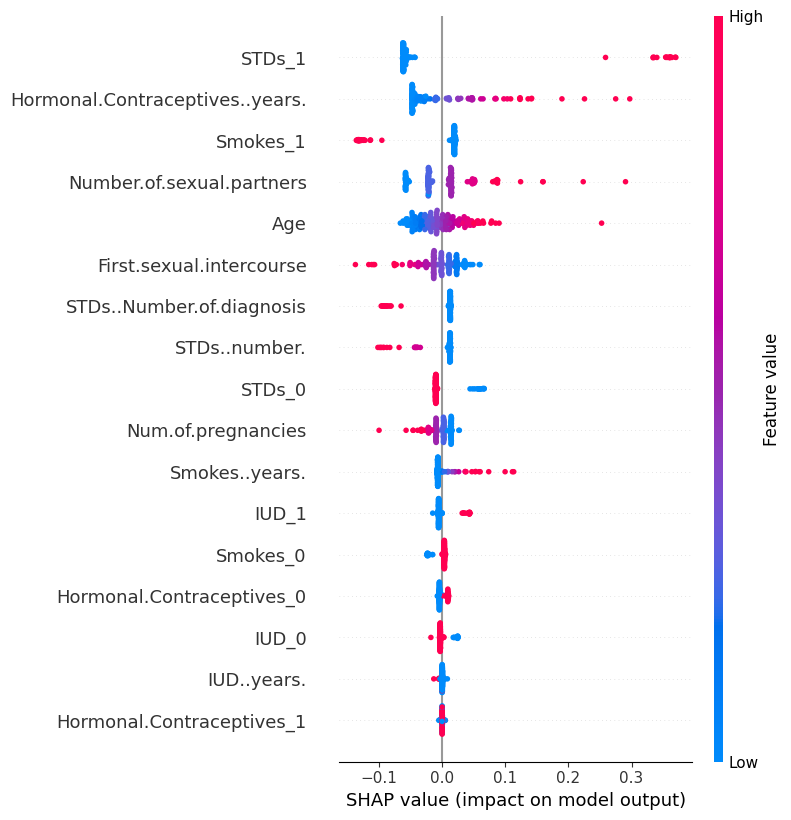

In [12]:
shap.summary_plot(shap_values[1], X_test)

In [13]:
X_test.head(3)

,Age,Number.of.sexual.partners,First.sexual.intercourse,Num.of.pregnancies,Smokes..years.,Hormonal.Contraceptives..years.,IUD..years.,STDs..number.,STDs..Number.of.diagnosis,Smokes_0,Smokes_1,Hormonal.Contraceptives_0,Hormonal.Contraceptives_1,IUD_0,IUD_1,STDs_0,STDs_1
156,27,1,16,2,0.0,7.0,0.0,0,0,1,0,0,1,1,0,1,0
544,17,2,12,1,0.0,0.0,0.0,0,0,1,0,0,1,1,0,1,0
228,31,2,17,3,0.0,0.0,0.0,0,0,1,0,0,1,1,0,1,0


In [15]:
shap_values[1].shape

(172, 17)

In [16]:
X_test.shape

(172, 17)

In [18]:
lr.predict_proba

<bound method LogisticRegression.predict_proba of LogisticRegression(penalty='l1', random_state=2022, solver='liblinear')>

In [30]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import keras.backend as K
import numpy as np
import json
import shap

# load pre-trained model and choose two images to explain
model = VGG16(weights='imagenet', include_top=True)
X,y = shap.datasets.imagenet50()
to_explain = X[[39,41]]

# load the ImageNet class names
url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
fname = shap.datasets.cache(url)
with open(fname) as f:
    class_names = json.load(f)

# explain how the input to the 7th layer of the model explains the top two classes
def map2layer(x, layer):
    feed_dict = dict(zip([model.layers[0].input], [preprocess_input(x.copy())]))
    return K.get_session().run(model.layers[layer].input, feed_dict)
e = shap.GradientExplainer(
    (model.layers[7].input, model.layers[-1].output),
    map2layer(X, 7),
    local_smoothing=0 # std dev of smoothing noise
)
shap_values,indexes = e.shap_values(map2layer(to_explain, 7), ranked_outputs=2)

# get the names for the classes
index_names = np.vectorize(lambda x: class_names[str(x)][1])(indexes)

# plot the explanations
shap.image_plot(shap_values, to_explain, index_names)

SyntaxError: invalid syntax (pywrap_tensorflow_internal.py, line 114)

In [29]:
!pip3 install tensorflow==1.15

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement tensorflow==1.15 (from versions: none)
ERROR: No matching distribution found for tensorflow==1.15


In [26]:
!pip3 install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 5.8 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pip
    Found existing installation: pip 22.3.1
    Uninstalling pip-22.3.1:
      Successfully uninstalled pip-22.3.1
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [32]:
import tensorflow

ImportError: Traceback (most recent call last):
  File "/Users/md1011/Library/Python/3.8/lib/python/site-packages/tensorflow/python/pywrap_tensorflow.py", line 41, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "/Users/md1011/Library/Python/3.8/lib/python/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "/Users/md1011/Library/Python/3.8/lib/python/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.8/lib/python3.8/imp.py", line 242, in load_module
    return load_dynamic(name, filename, file)
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.8/lib/python3.8/imp.py", line 342, in load_dynamic
    return _load(spec)
ImportError: dlopen(/Users/md1011/Library/Python/3.8/lib/python/site-packages/tensorflow/python/_pywrap_tensorflow_internal.so, 0x000E): tried: '/Users/md1011/Library/Python/3.8/lib/python/site-packages/tensorflow/python/_pywrap_tensorflow_internal.so' (mach-o file, but is an incompatible architecture (have 'x86_64', need 'arm64e'))


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/install_sources#common_installation_problems

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.